# 4. Logistic Regression
##### 선형 회귀 방식을 분류에 적용한 알고리즘
> 데이터가 어떤 범주에 속할 확률을 0~1 사이의 값으로 예측, 더 높은 범주에 속하는 쪽으로 분류

##### 선형 그래프 y = mx + b 를 시그모이드 함수로 바꿔 표현
##### => P = 1/1+e^-y
##### => ln(P/(1-P)) = mx + b

### 공부 시간에 따른 자격증 시험 합격 가능성

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('data/LogisticRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### 데이터 분리 (훈련데이터 8 : 테스트데이터 2)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 학습 (로지스틱 회귀 모델)

In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train) #학습시키기

LogisticRegression()

### 6시간 공부했을 때 예측?

In [55]:
classifier.predict([[6]])
# 결과 1 : 합격할 것으로 예측

array([1], dtype=int64)

In [56]:
classifier.predict_proba([[6]])
# 불합격 확률 14.1퍼, 합격확률 85.8퍼

array([[0.14150735, 0.85849265]])

### 4시간 공부했을 때 예측?

In [57]:
classifier.predict([[4]])
# 결과 0 : 불합격할 것으로 예측

array([0], dtype=int64)

In [58]:
classifier.predict_proba([[4]])

array([[0.6249966, 0.3750034]])

### 분류 결과 예측 (테스트 세트)

In [59]:
y_pred = classfier.predict(X_test)
y_pred # 예측값(테스트 세트에 predict)

array([1, 0, 1, 1], dtype=int64)

In [60]:
y_test # 실제값(테스트 세트)

array([1, 0, 1, 0], dtype=int64)

In [61]:
X_test # 공부 시간(테스트 세트)

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [62]:
classfier.score(X_test, y_test) # 모델 평가
# 전체 테스트 세트 4개 중에서 분류 예측을 올바로 맞힌 개수 3개 -> 3/4 = 0.75

0.75

### 데이터 시각화 (훈련 세트)

In [63]:
X_range = np.arange(min(X), max(X), 0.1)
# X 의 최소값에서 최대값까지를 0.1단위로 잘라서 데이터 생성

In [66]:
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
# np.exp(-y) 는 e^-y임 / y = mx + b
p
# 시그모이드 함수

array([[0.01035705, 0.01161247, 0.01301807, 0.0145913 , 0.01635149,
        0.01832008, 0.02052073, 0.02297953, 0.02572521, 0.02878929,
        0.03220626, 0.03601375, 0.04025264, 0.04496719, 0.05020505,
        0.05601722, 0.06245802, 0.06958479, 0.07745757, 0.08613861,
        0.09569165, 0.10618106, 0.11767067, 0.13022241, 0.14389468,
        0.15874043, 0.17480509, 0.19212422, 0.2107211 , 0.23060425,
        0.25176509, 0.27417574, 0.29778732, 0.32252874, 0.34830616,
        0.3750034 , 0.40248315, 0.43058927, 0.45914989, 0.48798142,
        0.51689314, 0.54569221, 0.57418876, 0.60220088, 0.6295591 ,
        0.65611024, 0.68172044, 0.70627722, 0.72969059, 0.75189324,
        0.77283994, 0.79250621, 0.81088652, 0.82799203, 0.84384828,
        0.85849265, 0.871972  , 0.88434036, 0.89565683, 0.90598377,
        0.91538521, 0.92392546, 0.93166808, 0.93867499, 0.9450058 ,
        0.95071738, 0.95586346, 0.96049453, 0.96465764, 0.96839647,
        0.97175136, 0.97475939, 0.97745455, 0.97

In [74]:
p = p.reshape(-1) # 1차원 배열 형태로 변경
p.shape

(95,)

In [72]:
import matplotlib.pyplot as plt

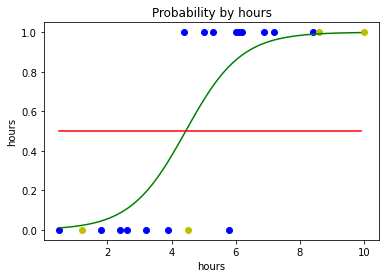

In [82]:
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='y')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range의 개수만큼 05로 가득찬 배열 만들기
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('hours')
plt.show()

### 데이터 시각화 (테스트 세트)

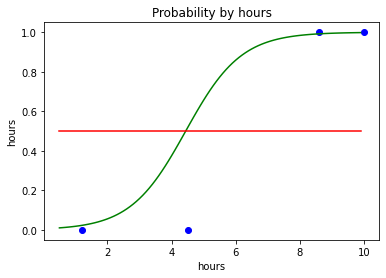

In [79]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') # X_range의 개수만큼 05로 가득찬 배열 만들기
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('hours')
plt.show()

In [83]:
classfier.predict_proba([[4.5]]) # 4.5시간 공부했을 때 확률 (모델에서는 51% 확률로 합격 예측, 실제로는 불합격)

array([[0.48310686, 0.51689314]])

### 혼동 행렬 (Confusion Matrix)

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# TRUE NEGATIVE (TN)       FALSE POSITIVE (FP)
# 불합격일거야 (예측)      합격일거야 (예측)
# 불합격 (실제)             불합격 (실제)

# FALSE NEGATIVE (FN)      TRUE POSITIVE (TP)
# 불합격일거야 (예측)      합격일거야 (예측)
# 합격 (실제)               합격 (실제)

array([[1, 1],
       [0, 2]], dtype=int64)

# 지도 학습의 앙상블 학습은 안했음
# 아마 비지도 학습의 차원축소도 안할듯(근데 이건 그냥 로그함수 쓰는것으로 알고 있음)